Data manipulation  libraries

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
plt.style.use('fivethirtyeight')
from subprocess import check_output


Select fields

In [2]:
a = pd.read_csv('./data/Diabetes_2016.csv', header=0)
b = pd.read_csv('./data/Diabetes_2017.csv', header=0)
c = pd.read_csv('./data/Diabetes_2018.csv', header=0)
# key atrs
important = ["IDE_EDA_ANO","IDE_SEX","DIAB_PAD_MAD","DIAB_HER","DIAB_HIJ",
"DIAB_OTROS","CVE_ACT_FIS","CVE_TAB","CVE_COMB_TUBER",
"CVE_COMB_CANCER","CVE_COMB_OBESIDAD","CVE_COMB_HIPER",
"CVE_COMB_VIH_SIDA","CVE_COMB_DEPRE","CVE_COMB_DISLI","CVE_COMB_CARDIO",
"CVE_COMB_HEPA","CVE_NUT","CVE_OFT",
"CVE_PIES","CVE_DIAB","CVE_TIPO_DISC_MOTO","CVE_TIPO_DISC_VISU",
"PESO","ESTATURA"]




# label

expected="CVE_DIAB"
# vertical join

result = pd.concat([a, b, c])

# hot encoding

result= result.replace("Masculino", 1)
result= result.replace("Femenino", 0)
result= result.replace("Si", 1)
result= result.replace("No", 0)
#result['CVE_DIAB'] = result['CVE_DIAB'].replace(0,2)
result["CVE_TAB"]  = result.apply(lambda row: 0 if "Nunca" in str(row["CVE_TAB"])  else 1,
                    axis=1)

result.fillna(0)
result["CVE_NUT"]  = result.apply(lambda row: 0 if "Nunca" in str(row["CVE_NUT"])  else 1,
                    axis=1)

result["CVE_OFT"]  = result.apply(lambda row: 0 if "Nunca" in str(row["CVE_OFT"])  else 1,
                    axis=1)

result["CVE_PIES"]  = result.apply(lambda row: 0 if "Nunca" in str(row["CVE_PIES"])  else 1,
                    axis=1)
result= result[important]



diab = result
print(diab.columns)

important.remove(expected)


   

Index(['IDE_EDA_ANO', 'IDE_SEX', 'DIAB_PAD_MAD', 'DIAB_HER', 'DIAB_HIJ',
       'DIAB_OTROS', 'CVE_ACT_FIS', 'CVE_TAB', 'CVE_COMB_TUBER',
       'CVE_COMB_CANCER', 'CVE_COMB_OBESIDAD', 'CVE_COMB_HIPER',
       'CVE_COMB_VIH_SIDA', 'CVE_COMB_DEPRE', 'CVE_COMB_DISLI',
       'CVE_COMB_CARDIO', 'CVE_COMB_HEPA', 'CVE_NUT', 'CVE_OFT', 'CVE_PIES',
       'CVE_DIAB', 'CVE_TIPO_DISC_MOTO', 'CVE_TIPO_DISC_VISU', 'PESO',
       'ESTATURA'],
      dtype='object')


Looking for nulls

In [3]:
diab.isnull().sum()

IDE_EDA_ANO           0
IDE_SEX               0
DIAB_PAD_MAD          0
DIAB_HER              0
DIAB_HIJ              0
DIAB_OTROS            0
CVE_ACT_FIS           0
CVE_TAB               0
CVE_COMB_TUBER        0
CVE_COMB_CANCER       0
CVE_COMB_OBESIDAD     0
CVE_COMB_HIPER        0
CVE_COMB_VIH_SIDA     0
CVE_COMB_DEPRE        0
CVE_COMB_DISLI        0
CVE_COMB_CARDIO       0
CVE_COMB_HEPA         0
CVE_NUT               0
CVE_OFT               0
CVE_PIES              0
CVE_DIAB              0
CVE_TIPO_DISC_MOTO    0
CVE_TIPO_DISC_VISU    0
PESO                  0
ESTATURA              0
dtype: int64

Labeling plot

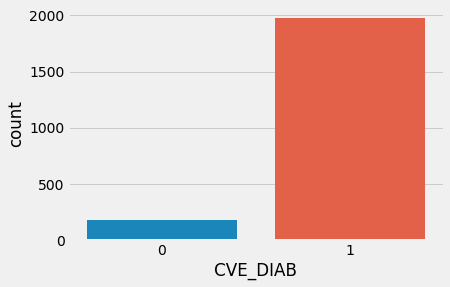

In [4]:
sns.countplot(x=expected,data=diab)
plt.show()

Data Distribution

<ipython-input-5-f68f61ad4d70>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot((length/2),3,j+1)


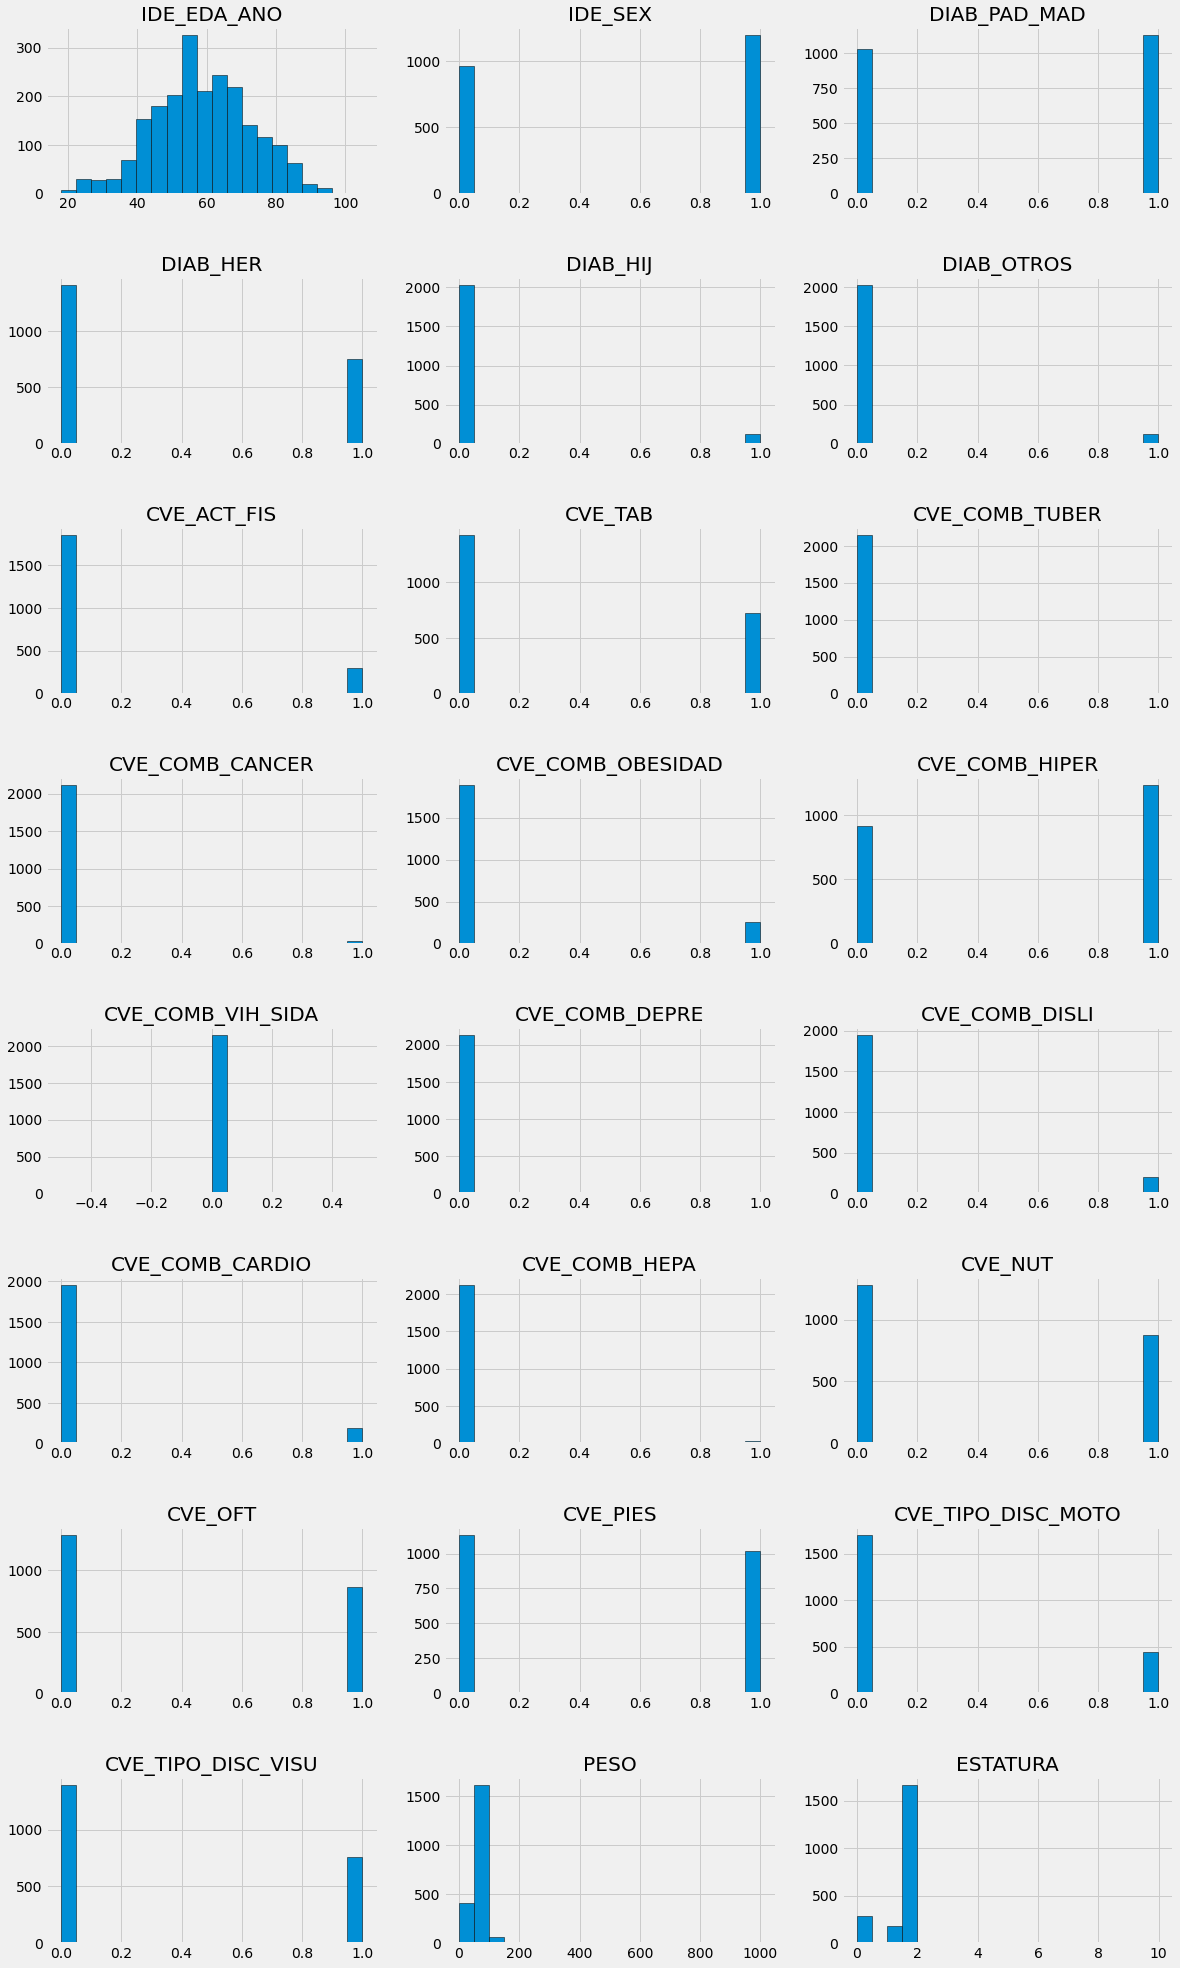

In [5]:
columns=important
plt.subplots(figsize=(18,50))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diab[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

Importing models

In [6]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

Splitting data

In [7]:
outcome=diab[expected]
data=diab[important]
train,test=train_test_split(diab,test_size=0.25,random_state=0,stratify=diab[expected])# stratify the outcome
train_X=train[important]
test_X=test[important]
train_Y=train[expected]
test_Y=test[expected]

### Models

In [8]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree', 'One Class SVM']



models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),
        LogisticRegression(),KNeighborsClassifier(n_neighbors=3),
        DecisionTreeClassifier(), svm.OneClassSVM(kernel="rbf")]
exportable={}

from sklearn.metrics import confusion_matrix



for i in range(len(models)):
    model=models[i]
    model.fit(train_X,train_Y)
    exportable[classifiers[i]]=model
    prediction=model.predict(test_X)
    
    print(i, confusion_matrix(test_Y, prediction))
    
    
    
    
    abc.append(metrics.accuracy_score(prediction,test_Y))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe




0 [[  0  45]
 [  0 494]]
1 [[  0  45]
 [  0 494]]
2 [[  0  45]
 [  0 494]]
3 [[  3  42]
 [ 15 479]]
4 [[ 10  35]
 [ 45 449]]
5 [[  0   0   0]
 [ 22   0  23]
 [250   0 244]]


,Accuracy
Linear Svm,0.916512
Radial Svm,0.916512
Logistic Regression,0.916512
KNN,0.894249
Decision Tree,0.851577
One Class SVM,0.452690


In [9]:
for name, model in exportable.items():
    print(name, "->", model.predict(train_X.head(1)))
    
    try :
        
        print( "\t->",model.predict_proba(train_X.head(1)))
    except:
        pass
    
   
    



    

Linear Svm -> [1]
Radial Svm -> [1]
Logistic Regression -> [1]
	-> [[0.02530474 0.97469526]]
KNN -> [1]
	-> [[0.33333333 0.66666667]]
Decision Tree -> [1]
	-> [[0. 1.]]
One Class SVM -> [-1]


Random Forest Classifier optimization

In [10]:
from sklearn.ensemble import RandomForestClassifier 
model= RandomForestClassifier(n_estimators=100,random_state=0)
X=diab[important]
Y=diab[expected]
model.fit(X,Y)

serie= pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)
d=serie.to_dict()
serie


IDE_EDA_ANO           0.241736
PESO                  0.198204
ESTATURA              0.177630
DIAB_PAD_MAD          0.037748
CVE_COMB_HIPER        0.034465
CVE_PIES              0.033878
IDE_SEX               0.033554
CVE_TAB               0.032106
DIAB_HER              0.025098
CVE_TIPO_DISC_VISU    0.023095
CVE_NUT               0.020141
CVE_TIPO_DISC_MOTO    0.019882
CVE_OFT               0.019196
CVE_ACT_FIS           0.017510
CVE_COMB_CARDIO       0.017127
CVE_COMB_OBESIDAD     0.016712
CVE_COMB_DISLI        0.013554
DIAB_OTROS            0.012798
CVE_COMB_HEPA         0.010264
DIAB_HIJ              0.005800
CVE_COMB_CANCER       0.005151
CVE_COMB_DEPRE        0.003697
CVE_COMB_TUBER        0.000654
CVE_COMB_VIH_SIDA     0.000000
dtype: float64

In [11]:

sorted_d = sorted(d.items(), key=lambda kv: kv[1])[::-1]
sorted_d

[('IDE_EDA_ANO', 0.24173613052076237),
 ('PESO', 0.19820401479137073),
 ('ESTATURA', 0.17762968124593698),
 ('DIAB_PAD_MAD', 0.03774751920568224),
 ('CVE_COMB_HIPER', 0.03446535059530417),
 ('CVE_PIES', 0.03387847905314664),
 ('IDE_SEX', 0.03355434609863631),
 ('CVE_TAB', 0.03210618203059873),
 ('DIAB_HER', 0.02509754395407189),
 ('CVE_TIPO_DISC_VISU', 0.023094606513371793),
 ('CVE_NUT', 0.020140931904600593),
 ('CVE_TIPO_DISC_MOTO', 0.019881891078669108),
 ('CVE_OFT', 0.019196136531436127),
 ('CVE_ACT_FIS', 0.01750955875383764),
 ('CVE_COMB_CARDIO', 0.017126795619429556),
 ('CVE_COMB_OBESIDAD', 0.01671246805910479),
 ('CVE_COMB_DISLI', 0.013553641633861975),
 ('DIAB_OTROS', 0.012798405225336025),
 ('CVE_COMB_HEPA', 0.01026437965827529),
 ('DIAB_HIJ', 0.0057997611191804846),
 ('CVE_COMB_CANCER', 0.0051510966106327405),
 ('CVE_COMB_DEPRE', 0.0036974820768009746),
 ('CVE_COMB_TUBER', 0.0006535977199527896),
 ('CVE_COMB_VIH_SIDA', 0.0)]

choosing features

In [12]:

import copy
argc= 3
weighted=[]
for i in range(3):
    weighted.append(sorted_d[i][0])

cut=copy.deepcopy(weighted)
cut.append(expected)

print(cut)

print(weighted)

print(diab.columns)


['IDE_EDA_ANO', 'PESO', 'ESTATURA', 'CVE_DIAB']
['IDE_EDA_ANO', 'PESO', 'ESTATURA']
Index(['IDE_EDA_ANO', 'IDE_SEX', 'DIAB_PAD_MAD', 'DIAB_HER', 'DIAB_HIJ',
       'DIAB_OTROS', 'CVE_ACT_FIS', 'CVE_TAB', 'CVE_COMB_TUBER',
       'CVE_COMB_CANCER', 'CVE_COMB_OBESIDAD', 'CVE_COMB_HIPER',
       'CVE_COMB_VIH_SIDA', 'CVE_COMB_DEPRE', 'CVE_COMB_DISLI',
       'CVE_COMB_CARDIO', 'CVE_COMB_HEPA', 'CVE_NUT', 'CVE_OFT', 'CVE_PIES',
       'CVE_DIAB', 'CVE_TIPO_DISC_MOTO', 'CVE_TIPO_DISC_VISU', 'PESO',
       'ESTATURA'],
      dtype='object')


In [13]:

diab2=diab[cut]
print(diab2.columns)


Index(['IDE_EDA_ANO', 'PESO', 'ESTATURA', 'CVE_DIAB'], dtype='object')


In [14]:
from sklearn.preprocessing import StandardScaler 
features=diab2[weighted]
scaler=StandardScaler()
features_standard=scaler.fit_transform(features)

x=pd.DataFrame(features_standard,columns=[weighted])


In [15]:
x[expected] = diab2[expected].values

In [16]:
outcome=x[expected]
train1,test1=train_test_split(x,test_size=0.25,random_state=0,stratify=x[expected])
train_X1=train1[weighted]
test_X1=test1[weighted]
train_Y1=train1[expected]
test_Y1=test1[expected]

In [17]:
dict_models={}
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree', 'One Class SVM']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier(),
       svm.OneClassSVM( kernel="rbf")]


for i in range(len(models)):
    model = models[i]
    model.fit(train_X1,train_Y1)
    dict_models[classifiers[i]]= model
    prediction=model.predict(test_X1)
    print(i, confusion_matrix(test_Y, prediction))


    abc.append(metrics.accuracy_score(prediction,test_Y1))
new_models_dataframe=pd.DataFrame(abc,index=classifiers)   
new_models_dataframe.columns=['New Accuracy'] 



0 [[  0  45]
 [  0 494]]
1 [[  0  45]
 [  0 494]]
2 [[  0  45]
 [  0 494]]
3 [[  4  41]
 [ 17 477]]
4 [[  4  41]
 [ 49 445]]
5 [[  0   0   0]
 [ 24   0  21]
 [250   0 244]]


In [18]:



for name, model in dict_models.items():
    print(name, "->", model.predict(train_X1.head(1)))
    try:  
        print("\t\t->",model.predict_proba(train_X1.head(1)))
    except:
        pass

Linear Svm -> [1]
Radial Svm -> [1]
Logistic Regression -> [1]
		-> [[0.08244645 0.91755355]]
KNN -> [1]
		-> [[0. 1.]]
Decision Tree -> [1]
		-> [[0. 1.]]
One Class SVM -> [-1]


In [19]:
new_models_dataframe=new_models_dataframe.merge(models_dataframe,left_index=True,right_index=True,how='left')
new_models_dataframe['Increase']=new_models_dataframe['New Accuracy']-new_models_dataframe['Accuracy']
new_models_dataframe

,New Accuracy,Accuracy,Increase
Linear Svm,0.916512,0.916512,0.000000
Radial Svm,0.916512,0.916512,0.000000
Logistic Regression,0.916512,0.916512,0.000000
KNN,0.892393,0.894249,-0.001855
Decision Tree,0.833024,0.851577,-0.018553
One Class SVM,0.452690,0.452690,0.000000
